In [143]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud
from nltk import bigrams
from nltk import trigrams

In [144]:
df = pd.read_csv("../survey_data/youth_opinions_3.csv")

for col in df:
    #get dtype for column
    dt = df[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        df[col] = df[col].fillna(0)
    else:
        df[col] = df[col].fillna("-")
        
df.shape

(74, 20)

In [145]:
df.columns = ['gender','faculty','ug_pg','year','csp_cleared','cleared_mode',
              'clearing_plan','freq_see_elderly','elderly_do','knowledge_elderly_pop','freq_interact_w_elderly',
              'difficulties_interacting','difficulties_face','interest_participate_elderly_center_csp','thoughts_inter_hub','thoughts','brand',
              'disrupt_student_lives','disrupt_reason','interest_csp_elderly_smu']

In [146]:
df["disrupt_reason"].sample(5)

50                       I don't foresee any disruption
20    I think the elderly are less likely to scream ...
60    It's still a choice for students to take part ...
54    Students can do this as a CSP, does not affect...
12             we have breaks in between classes anyway
Name: disrupt_reason, dtype: object

In [147]:
content = ""

for index,value in df["disrupt_reason"].items():
    content += value + " "
    


tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(content)


stop_words = stopwords.words('english')
len(words)

extra_stop = ["one","stop","say","said","many","use","like","ideas","thing",
              "ho","co","in","or","will","could","well","says","cid","url","content",
              "https","www","ura","gov","sg","singapore","_","unless","there","theres","already"]

words_filtered = []

for w in words:
    w = w.lower()
    w = w.strip()
    if w not in stop_words and w not in extra_stop:
        words_filtered.append(w)
        
len(words_filtered)

  
lemmatizer = WordNetLemmatizer()
words_filtered_stemmed = []

for w in words_filtered:
    words_filtered_stemmed.append(lemmatizer.lemmatize(w))

    


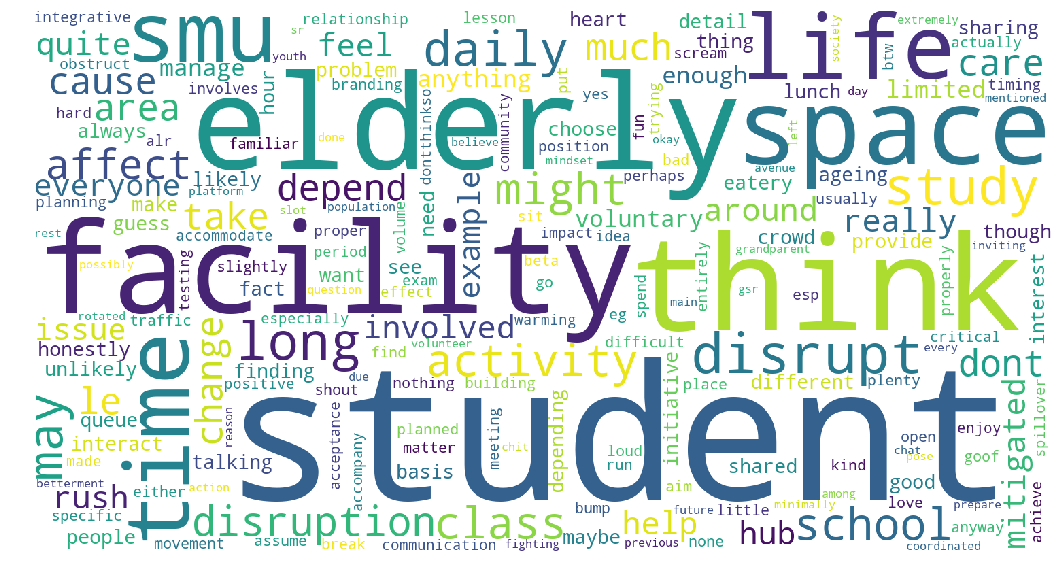

In [174]:
words_joined = " ".join([w for w in words_filtered_stemmed])
# Create a word cloud
my_wordcloud = WordCloud(background_color='white',
                         width=1500,
                         height=800).generate(words_joined)

plt.figure( figsize=(20,10))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()

In [210]:
n_grams_filtered_words  = []

n_grams_stop = ["i", "think","as","don","it","or","have","to","be","the","is","an","are","they","were","if","and"]

for w in words:
    w = w.lower()
    w = w.strip()
    
    if w not in n_grams_stop:
        n_grams_filtered_words.append(w)
        
n_grams_filtered_words_lemmatized = []
for w in n_grams_filtered_words:
    n_grams_filtered_words_lemmatized.append(lemmatizer.lemmatize(w,'v'))


In [211]:
bigrams_words = bigrams(n_grams_filtered_words_lemmatized)

bigrm_tup_list = list(bigrams_words)
bigram_list = []

for tup in bigrm_tup_list:
    content = ""
    for item in tup:
        content += item + "_"
    bigram_list.append(content)

bi_words_joined = " ".join([w for w in bigram_list])

In [212]:
trigram_words = trigrams(n_grams_filtered_words_lemmatized)
trigrm_tup_list = list(trigram_words)
trigram_list = []

for tup in trigrm_tup_list:
    content = ""
    for item in tup:
        content += item + "_"
    trigram_list.append(content)

tri_words_joined = " ".join([w for w in trigram_list])

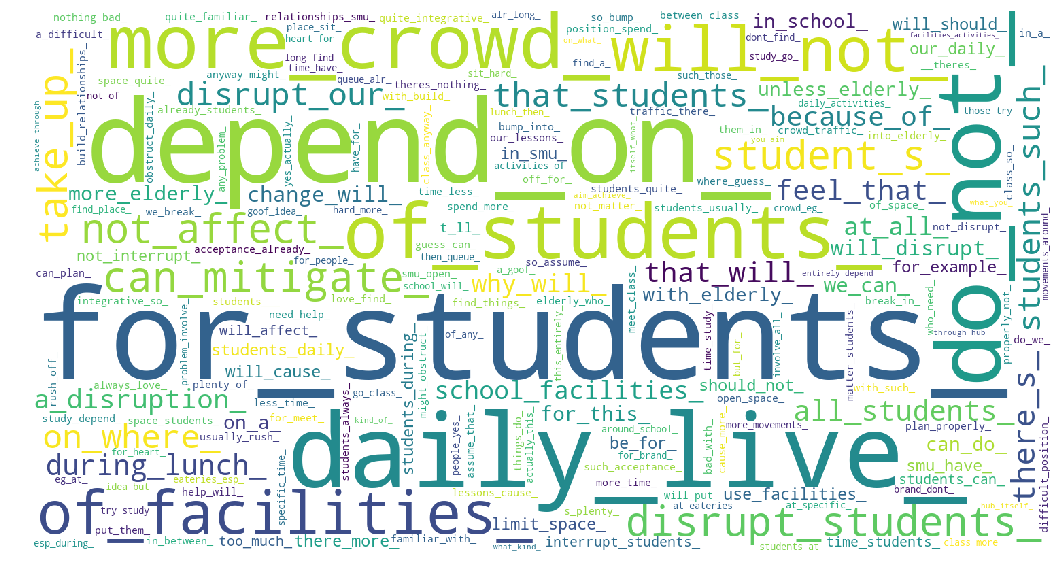

In [213]:


my_wordcloud_bi = WordCloud(background_color='white',
                         width=1500,
                         height=800).generate(bi_words_joined)

plt.figure( figsize=(20,10))
plt.imshow(my_wordcloud_bi)
plt.axis('off')
plt.show()

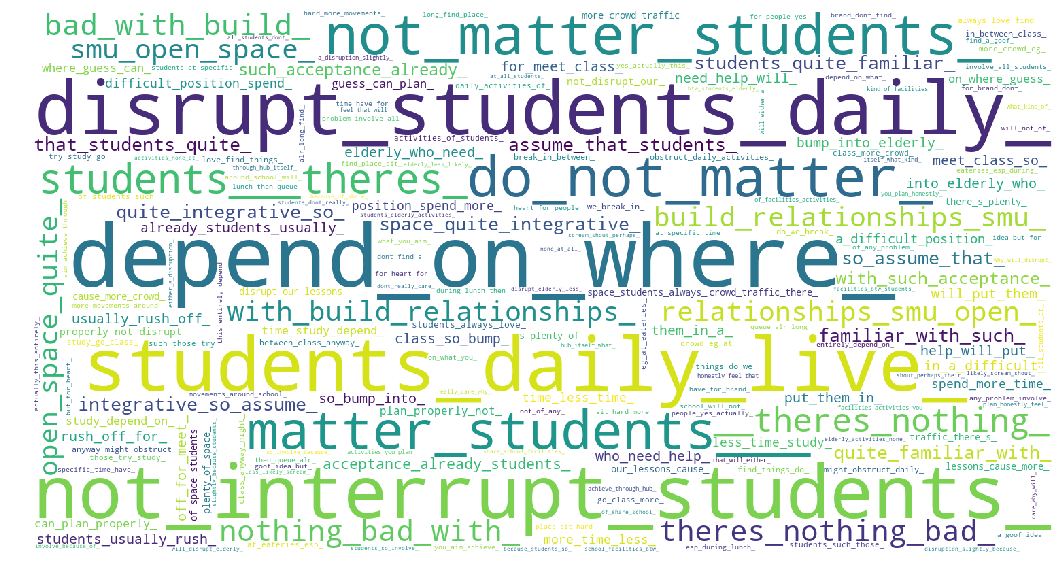

In [214]:


my_wordcloud_bi = WordCloud(background_color='white',
                         width=1500,
                         height=800).generate(tri_words_joined)

plt.figure( figsize=(20,10))
plt.imshow(my_wordcloud_bi)
plt.axis('off')
plt.show()